<a href="https://colab.research.google.com/github/durga41003/Data-Science/blob/main/CarML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ASSIGNMENT 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO 1.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

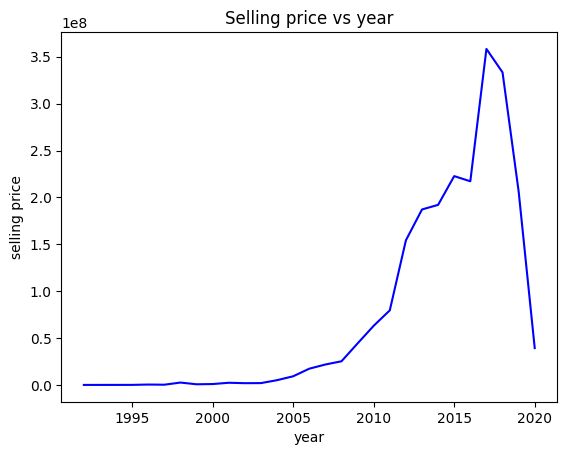

In [ ]:
sp=data.groupby('year')['selling_price'].sum()
plt.plot(sp.index,sp.values,color='Blue')
plt.title("Selling price vs year")
plt.xlabel('year')
plt.ylabel('selling price')
plt.show()

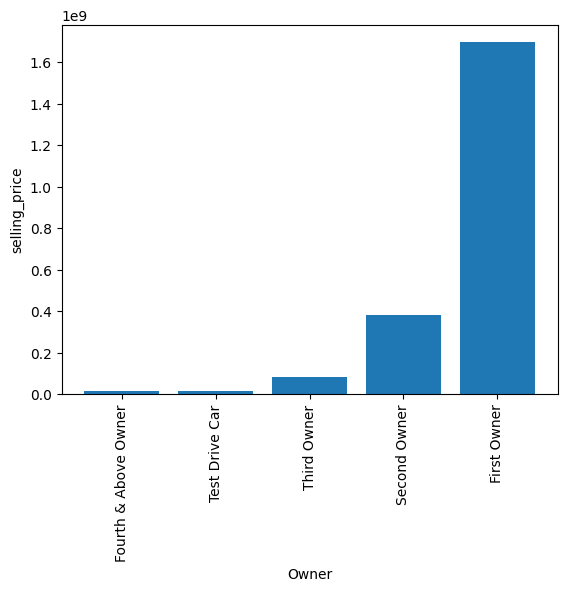

In [ ]:
sp = data.groupby('owner')['selling_price'].sum()
sp = sp.sort_values(ascending=True)
plt.xticks(rotation=90)
plt.bar(sp.index,sp.values)
plt.xlabel('Owner')
plt.ylabel('selling_price')
plt.show()

<Axes: >

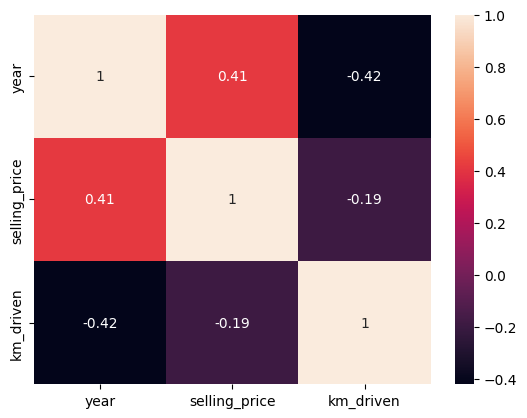

In [ ]:
nc=data.select_dtypes(include=np.number).columns.tolist()
carnum=data[nc]
cm=carnum.corr()
sns.heatmap(cm,annot=True)

<Axes: >

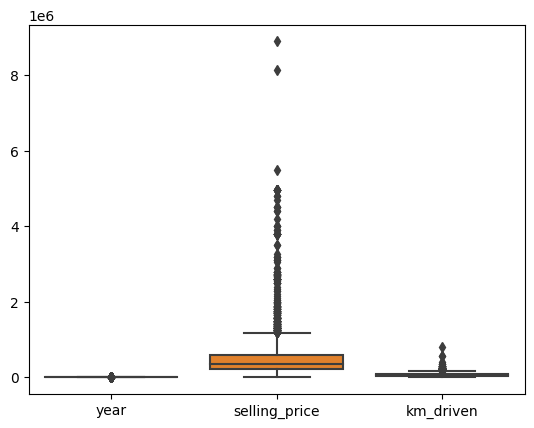

In [ ]:
sns.boxplot(data)

<Axes: xlabel='selling_price', ylabel='Density'>

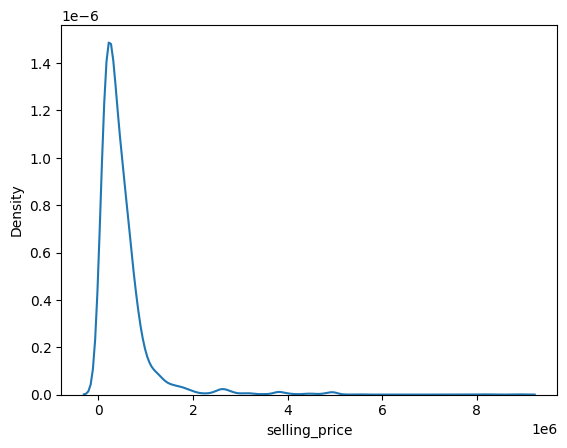

In [ ]:
sns.kdeplot(data.selling_price)

In [ ]:
slp=data.selling_price
x=slp.quantile(0.25)
y=slp.quantile(0.75)
iqr=y-x
l=x-1.5*iqr
u=y+1.5*iqr
slp[(slp<l)|(slp>u)]
data.selling_price[data.selling_price<l]
data.selling_price[data.selling_price>u]=u
print(u)

1186875.375


<ipython-input-15-00815d8bdd3d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.selling_price[data.selling_price>u]=u


<Axes: xlabel='selling_price', ylabel='Density'>

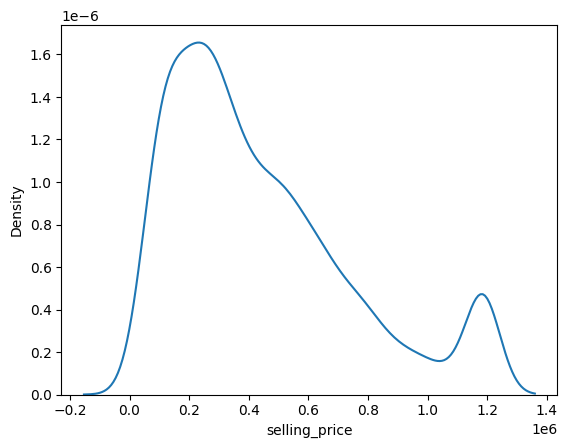

In [ ]:
sns.kdeplot(data.selling_price)

<Axes: >

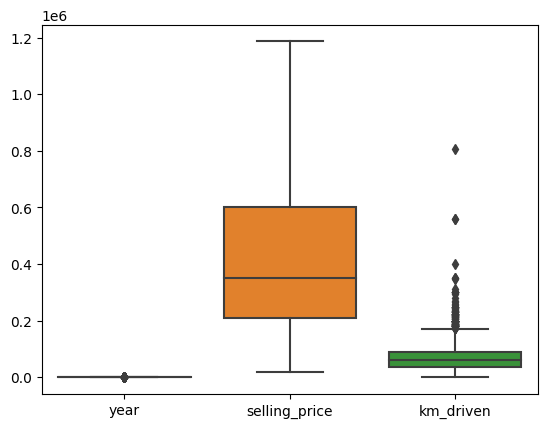

In [ ]:
sns.boxplot(data)

<Axes: ylabel='Density'>

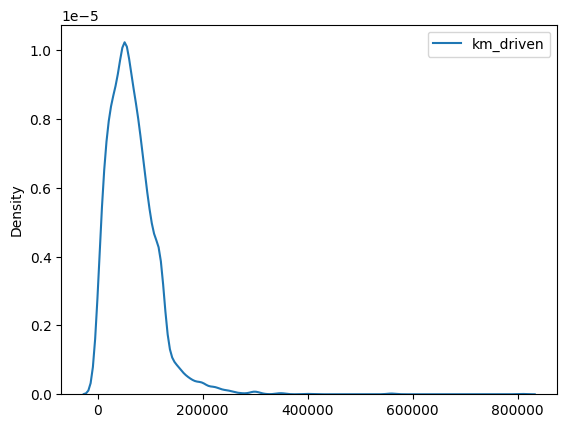

In [ ]:
sns.kdeplot(data[['km_driven']])

<Axes: >

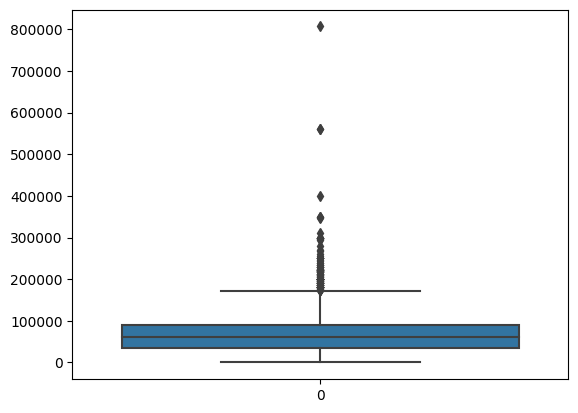

In [ ]:
sns.boxplot(data.km_driven)

In [ ]:
kd=data.km_driven
x=kd.quantile(0.25)
y=kd.quantile(0.75)
iqr=y-x
l=x-1.5*iqr
u=y+1.5*iqr
slp[(slp<l)|(slp>u)]
data.selling_price[data.km_driven<l]
data.selling_price[data.km_driven>u]=u
print(u)

172500.0


 **PREPROCESSING**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
fuel = data[['fuel']]
enc.fit(fuel)
fuel_enc =enc.transform(fuel)
fuel_enc_df = pd.DataFrame(fuel_enc, columns = data['fuel'].unique())
data =pd.concat([data,fuel_enc_df],axis=1)

In [ ]:
owner=data[['owner']]
enc.fit(owner)
owner_enc =enc.transform(owner)
owner_enc_df = pd.DataFrame(owner_enc, columns=data['owner'].unique())
data=pd.concat([data,owner_enc_df],axis=1)

In [ ]:
trans=data[['transmission']]
enc.fit(tran)
tran_enc = enc.transform(tran)
tran_enc_df = pd.DataFrame(tran_enc,columns =data['transmission'].unique())
data=pd.concat([data,tran_enc_df],axis=1)

In [ ]:
st=data[['seller_type']]
enc.fit(st)
st_enc = enc.transform(st)
st_enc_df =pd.DataFrame(st_enc,columns=data['seller_type'].unique())
data=pd.concat([data,st_enc_df],axis=1)

In [ ]:
x= data.drop(["name",'fuel','seller_type','transmission','owner','selling_price'],axis=1)
y=data.selling_price

In [ ]:
from sklearn.feature_selection import VarianceThreshold 
v=VarianceThreshold(threshold = 0)
v.fit(x)

VarianceThreshold(threshold=0)

In [ ]:
v.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
def corr(data,threshold):
  corr_column= set()
  corr=data.corr()
  for a in range(len(corr.columns)):
    for b in range(a):
      if abs(corr.iloc[a,b])>threshold:
        col=corr.columns[a]
        corr_column.add(col)
  return corr_column
cld=corr(x,0.5)
cld      


{'Automatic',
 'Dealer',
 'Electric',
 'First Owner',
 'Fourth & Above Owner',
 'Second Owner',
 'Test Drive Car',
 'Third Owner'}

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,year,km_driven,Petrol,Diesel,CNG,LPG,Electric,First Owner,Second Owner,Fourth & Above Owner,...,First Owner,Second Owner,Fourth & Above Owner,Third Owner,Test Drive Car,Manual,Automatic,Individual,Dealer,Trustmark Dealer
159,2015,175000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4334,2012,170000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1657,2006,110000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2188,2015,66521,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
581,2016,41000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2013,58500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3264,2012,110000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,2016,22000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2607,2015,70000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
trans=data[['transmission']]
enc.fit(tran)
tran_enc = enc.transform(tran)
tran_enc_df = pd.DataFrame(tran_enc,columns =data['transmission'].unique())
data=pd.concat([data,tran_enc_df],axis=1)

In [ ]:
st=data[['seller_type']]
enc.fit(st)
st_enc = enc.transform(st)
st_enc_df =pd.DataFrame(st_enc,columns=data['seller_type'].unique())
data=pd.concat([data,st_enc_df],axis=1)

In [ ]:
acc=("The accuracy of model is: ",r2_score(y_test,y_pred)*100)
acc

('The accuracy of model is: ', 65.55107775454103)

**LINEAR REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
Y_pred=lr.predict(x_test)
r2=r2_score(y_test,Y_pred)
mae=mean_absolute_error(y_test,Y_pred)

In [ ]:
print('R-Squared Error:',r2)
print('Mean absolute Error:',mae)

R-Squared Error: 0.599497073243583
Mean absolute Error: 147308.32461211618


In [ ]:
acc=("The accuracy of model is: ",r2_score(y_test,y_pred)*100)
acc

('The accuracy of model is: ', 65.55107775454103)

**POLYNOMIAL REGRESSION**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_absolute_error
poly=PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)
poly_reg =LinearRegression()
poly_reg.fit(x_poly_train,y_train)
y_pred = poly_reg.predict(x_poly_test)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [ ]:
print('R-Squared Error:',r2)
print('Mean absolute Error:',mae)

R-Squared Error: 0.6555107775454102
Mean absolute Error: 131076.38293617882


In [ ]:
acc=("The accuracy of model is: ",r2_score(y_test,y_pred)*100)
acc

('The accuracy of model is: ', 65.55107775454103)

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
rf_reg = RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(x_train,y_train)
Y_pred = rf_reg.predict(x_test)
r2=r2_score(y_test,Y_pred)
mae=mean_absolute_error(y_test,Y_pred)

In [ ]:
print('R-Squared Error:',r2)
print('Mean absolute Error:',mae)

R-Squared Error: 0.7067190634416431
Mean absolute Error: 109886.71444594269


In [ ]:
acc=("The accuracy of model is: ",r2_score(y_test,y_pred)*100)
acc

('The accuracy of model is: ', 65.55107775454103)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
def preprocess_input(year,km_driven,fuel,seller_type,transmission,owner,encoder):
  input_def=pd.DataFrame({'year':[year],'km_driven':[km_driven],'fuel':[fuel],'seller_type':[seller_type],'transmission':[transmission],'owner':[owner]})
  encoder.fit(data[['fuel']])
  encoded_fuel=encoder.transform(input_df[['fuel']])
  enc_fuel_df =pd.DataFrame(encoded_fuel,columns=data['fuel'].unique())
  encoder.fit(data[['seller_type']])
  encoded_seller_type = encoder.transform(input_df[['seller_type']])
  enc_seller_type_df =pd.DataFrame(encoded_fuel,columns=data['seller_type'].unique())
  encoder.fit(data[['transmission']])
  encoded_transmission = encoder.transform(input_df[['transmission']])
  enc_transmission_df =pd.DataFrame(encoded_fuel,columns=data['transmission'].unique())
  encoder.fit(data[['owner']])
  encoded_owner = encoder.transform(input_df[['owner']])
  enc_owner_df =pd.DataFrame(encoded_fuel,columns=data['owner'].unique())
  input_df = pd.concat([input_df,enc_fuel_df,enc_seller_type_df,enc_transmission_df,enc_owner_df])
  input_df.drop(['fuel','seller_type','transmission','owner'],axis=1,inplace=True)
  return input_df


In [ ]:
def make_prediction(input_data,encoder):
  preprocessed_input=preprocess_input(input_data['year'],input_data['km_driven'],input_data['fuel'],input_data['seller_type'],input_data['transmission'],input_data['owner'])
  prediction = rf_reg.pred(preprocessed_input)
  return prediction
input_data={'year':2007,'km_driven':50000,'fuel':'petrol','seller_type':'Individual','transmission':'Manual','owner':'First owner'}
print("Predicted selling price: Rs.",make_prediction(input_data,encoder))

    
    Predicted selling price: Rs.416900.0